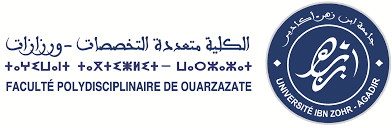


**Réaliser Par:**<br>
YOUSSEF EL WALI<br>
**Encadrer Par:**<br>
Abdelkrim EL MOUATASIM

# <span style="color: red;">AI for Gamma Telescope Classification</span>

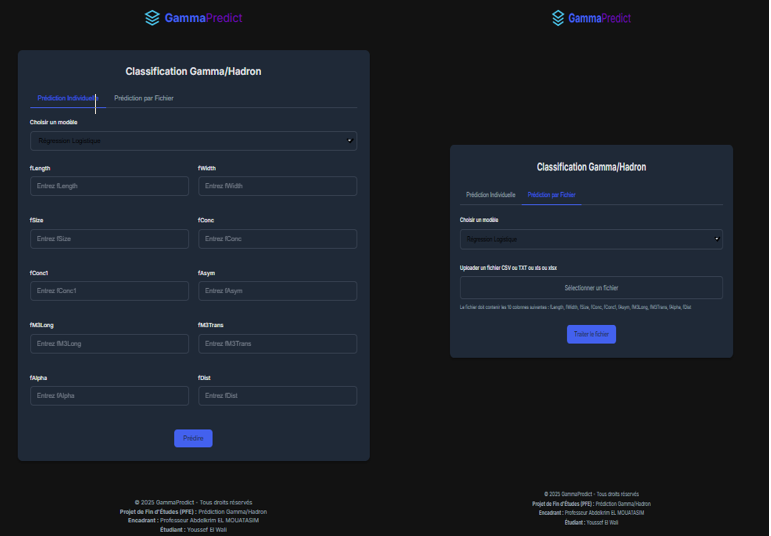

## Processus de Modélisation en Machine Learning

Le processus comprend plusieurs étapes essentielles :

- **Visualisation des données**
- **Prétraitement des données** avec une analyse exploratoire des données (*Exploratory Data Analysis - EDA*)
- **Entraînement des modèles** avec validation croisée (*Cross Validation*)
- **Développement des modèles de Machine Learning**, notamment :
  - Régression Logistique
  - Arbres de Décision (*Decision Trees*)
  - XGBClassifier
  - AdaBoostClassifier
  - RandomForestClassifier
  - support vector machine
- **Optimisation des hyperparamètres** à l'aide de la méthode *Grid Search*


<h1>L'objectif

L'objectif du télescope gamma MAGIC est de développer un système de prédiction basé sur la classification afin de distinguer les rayons gamma des hadrons dans le domaine de l'astrophysique.  

* La classification des rayons gamma et des hadrons est essentielle pour percer les mystères de l'univers, et le jeu de données du télescope MAGIC fournit des informations précieuses à cette fin.  
* Cette étude utilise des techniques d'apprentissage automatique telles que la régression logistique, les arbres de décision, la forêt aléatoire, XGBClassifier, AdaBoostClassifier, la machine à vecteurs de support, les réseaux de neurones et les techniques d’ensemble pour prédire et différencier ces particules à haute énergie.

<h2 style="color:red">1-chargé les bibliothéques nécessaires</h2>

In [ ]:
pip install ydata-profiling

In [ ]:
pip install sweetviz

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
import ydata_profiling as pp
from sklearn.metrics import classification_report
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#lire un fichier CSV nommé 'telescope_data.csv'

In [ ]:
df=pd.read_csv('telescope_data.csv')

In [ ]:
df.head(10)

#Afficher les 5 dernières lignes du DataFrame

In [ ]:
df.tail(5)

#calculer le nombre d'éléments uniques dans chaque colonne du DataFrame

In [ ]:
df.nunique()

#<h1>**Data exploration Analysis(EDA)**

**<h2>Dataset Information.</h2>**
l'objectif est de classer chaque observation comme étant un signal de type gamma ("g") ou un bruit de fond de type hadron ("h")

**1.  fLength:**  continuous  -  major axis of ellipse [mm] <br>
**2.  fWidth:**   continuous  - minor axis of ellipse [mm] <br>
**3.  fSize:**  continuous  - 10-log of sum of content of all pixels [in #phot]<br>
**4.  fConc:**    continuous  - ratio of sum of two highest pixels over fSize  [ratio]<br>
**5.  fConc1:**   continuous  - ratio of highest pixel over fSize  [ratio]<br>
**6.  fAsym:**    continuous  - distance from highest pixel to center, projected onto major axis [mm]<br>
**7.  fM3Long:** continuous  - 3rd root of third moment along major axis  [mm]<br>
**8.  fM3Trans:** continuous  - 3rd root of third moment along minor axis  [mm]<br>
**9.  fAlpha:**   continuous  - angle of major axis with vector to origin [deg]<br>
**10.  fDist:**    continuous  - distance from origin to center of ellipse [mm]<br>
**11.  class:**    g,h  - gamma (signal), hadron (background)


#Pandas Profiling report of "dataset"

L'objectif de ce code est de générer un rapport d'analyse exploratoire des données à l'aide de **Pandas Profiling**.
Il fournit un résumé détaillé des statistiques descriptives, des distributions des variables, des corrélations et des valeurs manquantes dans le DataFrame **`df`**.
Le rapport est personnalisé avec un titre et un style HTML qui occupe toute la largeur de la page.
Cela permet d'analyser rapidement les caractéristiques du dataset.


In [ ]:
pp.ProfileReport(df,title = 'Pandas Profiling report of "dataset"', html = {'style':{'full_width': True}})

In [ ]:
report = sv.analyze ( df )

report.show_notebook ( )

**Visualiser La Répartition Des Classes Dans Le dataset df à l'aide d'un graphique en camembert (pie chart)**

In [ ]:
cat =df["class"].value_counts()
cat_index=cat.index
plt.figure(figsize=(10, 4))
plt.title("Class")
plt.pie(cat,labels=cat_index,explode=[0,0.1],shadow=True,autopct="%.2F")
plt.show()

In [ ]:
df.columns

**Nombre de gamma par catégorie de fAlpha**

In [ ]:
falpha = df['fAlpha']
class_gamma = df['class'] == 'g'
cut_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
cut_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']

# Catégoriser fAlpha
falpha_cat = pd.cut(falpha, bins=cut_bins, labels=cut_labels)

# Créer un DataFrame groupé
grouped_df = pd.DataFrame({'Tranches fAlpha': falpha_cat, 'Nombre de gamma': class_gamma})
grouped_df = grouped_df.groupby('Tranches fAlpha')['Nombre de gamma'].sum().reset_index()

# Tracer le graphique
plt.bar(grouped_df['Tranches fAlpha'], grouped_df['Nombre de gamma'])
plt.title('Nombre de gamma par catégorie de fAlpha')
plt.xlabel('Catégorie de fAlpha')
plt.ylabel('Nombre de gamma')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

In [ ]:
df['fLength'].max()

In [ ]:
df['fLength'].min()

In [ ]:
# Vérifier si 'fLength' est bien la colonne correcte
fLength = df['fLength']
class_gamma = df['class'] == 'g'  # Filtrer uniquement les classes 'g' (gamma)

# Définir les tranches pour fLength en fonction des valeurs min et max
cut_bins = [4, 24, 44, 64, 84, 104, 124, 144]
cut_labels = [
    '4-24', '24-44', '44-64', '64-84', '84-104', '104-124', '124-144'
]
# Catégoriser fLength
fLength_cat = pd.cut(fLength, bins=cut_bins, labels=cut_labels)

# Créer un DataFrame groupé
grouped_df = pd.DataFrame({'Tranches fLength': fLength_cat, 'Nombre de gamma': class_gamma})
grouped_df = grouped_df.groupby('Tranches fLength')['Nombre de gamma'].sum().reset_index()

# Tracer le graphique
plt.figure(figsize=(12, 6))  # Ajuster la taille du graphique
plt.bar(grouped_df['Tranches fLength'], grouped_df['Nombre de gamma'], color='skyblue')
plt.title('Nombre de gamma par catégorie de fLength')
plt.xlabel('Catégorie de fLength')
plt.ylabel('Nombre de gamma')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille pour une meilleure lecture
plt.tight_layout()  # Ajuster l'espacement
plt.show()

**Répartition des gamma par catégorie de fWidth**

In [ ]:
# Vérification si les colonnes existent
if 'fWidth' not in df.columns or 'class' not in df.columns:
    print("Erreur : les colonnes 'fWidth' et 'class' sont absentes.")
else:
    # Sélectionner les colonnes pertinentes
    fwidth = df['fWidth']
    class_gamma = df['class'] == 'g'  # Filtrer uniquement les classes 'g' (gamma)

    # Définir les tranches pour fWidth
    cut_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
    cut_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']

    # Catégoriser fWidth
    fwidth_cat = pd.cut(fwidth, bins=cut_bins, labels=cut_labels)

    # Créer un DataFrame groupé
    grouped_df = pd.DataFrame({'Tranches fWidth': fwidth_cat, 'Nombre de gamma': class_gamma})
    grouped_df = grouped_df.groupby('Tranches fWidth')['Nombre de gamma'].sum().reset_index()

    # Vérification si le DataFrame est vide
    if grouped_df.empty:
        print("Le DataFrame groupé est vide, il n'y a aucune donnée correspondant à ces critères.")
    else:
        # Afficher un aperçu du DataFrame groupé
        print("Aperçu du DataFrame groupé :")
        print(grouped_df.head())

        # Tracer le bar chart
        plt.figure(figsize=(10, 6))  # Taille du graphique (10x6 pouces)
        plt.bar(grouped_df['Tranches fWidth'], grouped_df['Nombre de gamma'], color='skyblue')

        # Ajouter un titre et des labels
        plt.title('Répartition des gamma par catégorie de fWidth', fontsize=16, pad=20)
        plt.xlabel('Tranches fWidth', fontsize=14)
        plt.ylabel('Nombre de gamma', fontsize=14)

        # Ajouter des étiquettes sur les barres
        for i, value in enumerate(grouped_df['Nombre de gamma']):
            plt.text(i, value + 0.2, str(value), ha='center', fontsize=12)

        # Afficher le graphique
        plt.xticks(rotation=45)  # Faire pivoter les étiquettes des abscisses pour une meilleure lisibilité
        plt.tight_layout()
        plt.show()



**converti les catégorie 'g' 'h' en 0 et 1**

In [ ]:
#converti les catégorie 'g' 'h' en 0 et 1
df['class']=df['class'].map({'g':0,'h':1})
df.head()

#le comportement de chaque colonne en fonction de variable dépendante

In [ ]:
plt.hist(df[df['class'] == 1]['fLength'], color='#FF5733', bins=10, label='Hadron Rays')  # Orange vif
plt.hist(df[df['class'] == 0]['fLength'], color='#3498DB', bins=10, label='Gamma Rays', alpha=0.5)  # Bleu

plt.xlabel("Axe majeur d'une ellipse en millimètres")
plt.legend()
plt.show()

- Le **'FLength'** (axe majeur d'une ellipse en millimètres) est identifié comme une caractéristique distinctive entre les rayons gamma et les rayons hadroniques. La différence significative d'environ 4000 mm suggère que cette caractéristique pourrait être cruciale pour discriminer les deux types de particules.  

- Cela suggère que l'étendue spatiale de l'image de la gerbe produite par les rayons gamma est bien plus grande que celle des rayons hadroniques. Cela pourrait être dû aux interactions différentes des rayons gamma et des rayons hadroniques avec l'atmosphère terrestre.

In [ ]:
plt.hist(df[df['class'] == 1]['fWidth'], color='#FF914D', bins=10, label='Hadron Rays')  # Orange doux
plt.hist(df[df['class'] == 0]['fWidth'], color='#3B7DD8', bins=10, label='Gamma Rays', alpha=0.5)  # Bleu
plt.xlabel('Axe mineur d\'une ellipse en millimètres')
plt.legend()
plt.show()

- La différence de **'FWidth'** résulte du dépôt d'énergie et des interactions distinctes des rayons gamma et des rayons hadroniques avec l'atmosphère terrestre.  

- La largeur plus importante de **'FWidth'** pour les rayons gamma suggère une cascade électromagnétique plus étendue et plus énergétique, comparée à la cascade hadronique plus confinée des rayons hadroniques.

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)

plt.hist(df[df['class'] == 1]['fConc'], color='#FF6F61', bins=10, label='FConc Rayons Hadroniques')  # Rouge-orangé
plt.hist(df[df['class'] == 0]['fConc'], color='#1F77B4', bins=10, label='FConc Rayons Gamma', alpha=0.5)  # Bleu

plt.xlabel("Le rapport de la somme des deux valeurs de pixels les plus élevées sur fSize")

plt.legend()
plt.show()

- Cela implique que la lumière de Tcherenkov émise par les rayons gamma a tendance à être plus concentrée dans une zone plus petite au sein de l’image de la gerbe, tandis que les rayons hadroniques présentent une distribution plus étalée.  

- La lumière de Tcherenkov émise par les électrons et positrons de haute énergie dans la cascade électromagnétique tend à être plus concentrée dans une zone spatiale plus réduite. Cette concentration de lumière de Tcherenkov entraîne une valeur plus élevée de **'FConc'** pour les rayons gamma.  

- L’énergie plus élevée des rayons gamma par rapport à la plupart des rayons hadroniques contribue à des cascades électromagnétiques plus vastes et plus énergétiques. Le dépôt d’énergie plus important dans l’atmosphère conduit à une gerbe plus concentrée pour les rayons gamma, augmentant ainsi la valeur de **'FConc'**.

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['class'] == 1]['fConc1'], color='#FF6F61', bins=10, label='FConc1 Rayons Hadroniques')  # Rouge-orangé
plt.hist(df[df['class'] == 0]['fConc1'], color='#1F77B4', bins=10, label='FConc1 Rayons Gamma', alpha=0.5)  # Bleu

plt.xlabel("Le rapport de la valeur du pixel le plus élevé sur fSize")

plt.legend()
plt.show()


- Les valeurs plus élevées de **'FConc1'** pour les rayons gamma suggèrent que les gerbes de rayons gamma ont tendance à produire une émission lumineuse plus intense, localisée et focalisée, où le pixel le plus lumineux contribue de manière significative à la lumière de Tcherenkov observée par le télescope.  

- Les valeurs plus faibles de **'FConc1'** pour les rayons hadroniques indiquent que la distribution de la lumière de Tcherenkov dans les images de gerbes hadroniques est plus uniformément répartie, sans qu’un seul pixel ne domine l’émission.  

- La différence de **'FConc1'** peut être attribuée aux variations d’énergie et aux interactions des particules des rayons gamma et des rayons hadroniques avec l’atmosphère terrestre.

**visualiser la distribution des données**

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10, 4))
    plt.title(col)

    # Tracer l'histogramme avec la courbe KDE
    sns.histplot(df[col], kde=True, bins=50)

    plt.show()

In [ ]:
X = df.drop('class',axis=1)
X = X.drop('Unnamed: 0',axis=1)
y=df['class']

#Détermination des Valeurs Aberrantes (Outliers)

In [ ]:
plt.figure(figsize=(8,12))
Q1=X.quantile(0.25)
Q3=X.quantile(0.75)
IQR=Q3-Q1
qsup=1.5*IQR+Q3
qinf=Q1-1.5*IQR
X.boxplot()
print("les valeurs maximale est :",qsup)
print("les valeurs minimale est :",qinf)

* Nous pouvons observer la présence de valeurs aberrantes dans les colonnes ou caractéristiques suivantes :
    - **FLength**
    - **FWidth**
    - **FSize**
    - **FConc1**
    - **FAsym**
    - **FM3Long**
    - **FM3Trans**
    - **FDist**

1. **Valeurs aberrantes dans FLength, FWidth, et FSize** :
    * **FLength**, **FWidth**, et **FSize** représentent probablement des mesures liées à la taille et à la forme des objets détectés dans les images du télescope.
    * La présence de valeurs aberrantes dans ces colonnes pourrait indiquer des cas rares ou extrêmes d'objets ayant des tailles ou des formes significativement différentes par rapport à la majorité des observations.

2. **Valeurs aberrantes dans FConc1** :
    * **FConc1** pourrait représenter une mesure de la concentration ou de la compacité des objets détectés.
    * La présence de valeurs aberrantes dans **FConc1** suggère l'existence d'objets exceptionnellement compacts ou dispersés dans les images du télescope par rapport au reste du jeu de données.

3. **Valeurs aberrantes dans FAsym** :
    * La présence de valeurs aberrantes dans cette colonne suggère l'existence d'objets très asymétriques dans les données, ce qui pourrait être des cas rares ou inhabituels.

4. **Valeurs aberrantes dans FM3Long et FM3Trans** :
    * **FM3Long** et **FM3Trans** représentent probablement des caractéristiques liées au troisième moment de la distribution des longueurs des objets détectés et de leur transformation.
    * La présence de valeurs aberrantes dans ces colonnes implique des écarts significatifs par rapport à la distribution typique des longueurs des objets dans les données.

5. **Valeurs aberrantes dans FDist** :
    * **FDist** représente probablement la distance des objets détectés par rapport au télescope.
    * Les valeurs aberrantes dans cette colonne pourraient indiquer des objets beaucoup plus proches ou beaucoup plus éloignés du télescope que la majorité des observations.

#Person correlation qui décrire la relation entre chaque deux variables

**Le r de Pearson ou la corrélation bivariée est une statistique qui mesure la corrélation linéaire entre deux variables X et Y. Sa valeur est comprise entre +1 et -1. Une valeur de +1 indique une corrélation linéaire totalement positive, 0 signifie aucune corrélation linéaire, et -1 correspond à une corrélation linéaire totalement négative.**

In [ ]:
data=df.drop('Unnamed: 0',axis=1)

In [ ]:
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

La corrélation entre **Fconc** et **FLength** est de **-0,63**.

- Cette corrélation négative suggère qu'à mesure que la valeur de **FLength** (l'axe majeur de l'ellipse) augmente, la valeur de **Fconc** (le rapport de la somme des deux pixels les plus lumineux sur **fSize**) tend à diminuer.  

- En d'autres termes, plus l'élongation de l'ellipse augmente (**FLength** plus grand), plus la concentration des valeurs des pixels dans l'image a tendance à être faible (**Fconc** plus petit).  

- Cette relation pourrait potentiellement indiquer que les rayons gamma et les hadrons présentent des schémas d'élongation et de concentration des pixels différents dans les images.

La corrélation entre **Fconc** et **FWidth** est de **-0,61**.

- De même, cette corrélation négative indique qu'à mesure que la valeur de **FWidth** (l'axe mineur de l'ellipse) augmente, la valeur de **Fconc** diminue.  

- Cela signifie que les ellipses plus allongées (**FWidth** plus grand) ont tendance à présenter une concentration de pixels plus faible (**Fconc** plus petit).  

- Une fois de plus, cette relation pourrait avoir des implications pour la différenciation entre les rayons gamma et les hadrons, car ils pourraient présenter des schémas distincts d'élongation et de répartition des pixels dans les images.

La corrélation entre **Fconc** et **FSize** est de **-0,85**.

- La forte corrélation négative entre **Fconc** et **FSize** (le logarithme de la somme du contenu de tous les pixels dans l'image) indique qu'à mesure que la taille globale de l'image augmente (**FSize** plus grand), la concentration des pixels (**Fconc**) tend à diminuer.  

- Les images de plus grande taille peuvent présenter une répartition plus étalée des valeurs de pixels, entraînant une concentration plus faible.  

- Cette corrélation pourrait être précieuse pour comprendre la relation entre la taille de l'image et la concentration des valeurs de pixels, afin de différencier les rayons gamma des hadrons.

La corrélation entre **Fconc** et **FConc1** est de **0,98**.

- Cette très forte corrélation positive entre **Fconc** et **FConc1** (le rapport de la valeur du pixel le plus élevé sur **FSize**) suggère que **Fconc1** et **Fconc** sont presque parfaitement linéairement liés.  

- Lorsque **FConc1** augmente (valeur du pixel le plus élevé par rapport à **FSize**), **Fconc** tend à augmenter proportionnellement.  

- Cette relation implique que la valeur du pixel le plus élevé dans l'image a un impact significatif sur la concentration globale des valeurs des pixels.  

- Cette relation pourrait être cruciale pour distinguer les rayons gamma des hadrons, car ces derniers pourraient présenter des schémas distincts de concentration des pixels les plus élevés par rapport à la taille globale de l'image.

**The correlation between FLength and FWidth is 0.77**

- La corrélation positive de **0,77** entre **FLength** et **FWidth** suggère qu'il existe une forte relation linéaire entre l'axe majeur (**FLength**) et l'axe mineur (**FWidth**) de l'ellipse en millimètres.  

- Cela pourrait signifier qu'à mesure que l'axe majeur de l'ellipse augmente, l'axe mineur tend également à augmenter.  

- Cela implique que les formes des images détectées ont tendance à être allongées le long des deux axes lors de l'observation des rayons gamma et des hadrons.

La corrélation entre **FLength** et **FSize** est de **0,70**.

- La corrélation positive de **0,70** entre **FLength** et **FSize** indique une relation linéaire modérée entre l'axe majeur (**FLength**) et le logarithme (en base 10) de la somme du contenu de tous les pixels de l'image (**FSize**).  

- Cette corrélation suggère qu'à mesure que l'axe majeur de l'ellipse augmente, la somme des valeurs des pixels tend à augmenter de manière logarithmique.  

- Cela pourrait impliquer que les images plus grandes et plus étendues sont associées à des valeurs de pixels plus élevées, ce qui pourrait être attendu à mesure que des rayons plus énergétiques sont détectés, entraînant des images plus grandes avec un contenu de pixels plus élevé.

La corrélation entre **FLength** et **FConc1** est de **-0,60**.

- La corrélation négative de **-0,60** entre **FLength** et **FConc1** suggère une relation linéaire inverse modérée entre l'axe majeur (**FLength**) et le rapport de la valeur du pixel le plus élevé sur **FSize** (**FConc1**).  

- Cela signifie qu'à mesure que l'axe majeur de l'ellipse augmente, le rapport de la valeur du pixel le plus élevé par rapport à la somme de toutes les valeurs des pixels tend à diminuer.  

- Dans le contexte des rayons gamma et des hadrons, cela pourrait impliquer que les images allongées sont associées à une répartition plus uniforme des valeurs des pixels, avec moins de dépendance sur une seule valeur de pixel élevée.

La corrélation entre **FWidth** et **FSize** est de **0,72**.

- Cette relation pourrait être due au fait que lorsque l'axe mineur d'une ellipse est plus grand, il couvre une plus grande surface, entraînant une somme plus élevée du contenu des pixels dans l'image.  

- Cette corrélation pourrait être significative pour comprendre les caractéristiques des particules détectées.  

- Par exemple, cela pourrait impliquer que les images avec des axes mineurs plus grands de l'ellipse (indiquant des distributions spatiales plus larges) sont plus susceptibles de correspondre à des rayons gamma, car les rayons gamma ont tendance à se diffuser davantage en raison de leur nature électromagnétique.  

- D'autre part, les rayons hadrons, étant plus massifs et chargés, pourraient présenter des dépôts d'énergie plus concentrés avec des axes mineurs plus petits.

La corrélation entre **FWidth** et **FConc1** est de **-0,58**.

- Cette corrélation suggère que lorsque l'axe mineur de l'ellipse (**FWidth**) augmente, le rapport de la valeur du pixel le plus élevé sur **FSize** (**FConc1**) tend à diminuer.  

- Inversement, lorsque l'axe mineur diminue, le rapport tend à augmenter.  

- Cette corrélation pourrait être liée aux caractéristiques du dépôt d'énergie dans les images.  

- Une valeur plus élevée de **FConc1** signifie que la valeur du pixel le plus élevé contribue de manière significative à la somme globale du contenu des pixels, ce qui indique un dépôt d'énergie plus concentré et localisé.  

- Par conséquent, une corrélation négative avec **FWidth** pourrait impliquer que lorsque l'axe mineur (**FWidth**) de l'ellipse est plus grand, le dépôt d'énergie a tendance à être plus réparti (valeur plus faible de **FConc1**), ce qui pourrait correspondre aux rayons gamma.  

- Inversement, lorsque l'axe mineur est plus petit, le dépôt d'énergie est plus concentré (valeur plus élevée de **FConc1**), ce qui pourrait être indicatif des rayons hadrons.

#**le PowerTransformer avec Yeo-Johnson**

**Appliquer une transformation de normalisation des données sur les colonnes numériques du DataFrame X en utilisant le PowerTransformer avec la méthode Yeo-Johnson**

In [ ]:
# Sélectionner uniquement les colonnes numériques
numerical_cols = X.select_dtypes(include=['number']).columns

# Initialiser le PowerTransformer avec Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Appliquer la transformation
X[numerical_cols] = pt.fit_transform(X[numerical_cols])

**Le RobustScaler et le QuantileTransformer sont robustes aux valeurs aberrantes dans le sens où l'ajout ou la suppression de ces valeurs dans l'ensemble d'entraînement produira une transformation à peu près identique.**

In [ ]:
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
import pickle

# Sauvegarder le PowerTransformer
with open('power_transformer.pkl', 'wb') as f:
    pickle.dump(pt, f)

# Sauvegarder le RobustScaler
with open('robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

SMOTE signifie **Synthetic Minority Over-sampling Technique** (Technique de suréchantillonnage des classes minoritaires synthétiques). Il s'agit d'une technique de suréchantillonnage utilisée pour équilibrer la distribution des classes dans un ensemble de données en créant des échantillons synthétiques pour la classe minoritaire. SMOTE est une technique d'augmentation de données qui génère de nouveaux échantillons synthétiques en interpolant entre les échantillons existants de la classe minoritaire.

In [ ]:
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X,y)

In [ ]:
y_resampled.value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Modèle de Régression Logistique

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
target_names = ['Gamma', 'hardon']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# Prédire les probabilités
y_probs = model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculer l'AUC
auc_score = roc_auc_score(y_test, y_probs)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()

**La validation croisée**

In [ ]:
accuracy = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())
precision= cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision.mean())

In [ ]:
y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)

In [ ]:
target_names = ['Gamma', 'hardon']
print(classification_report(y_resampled, y_pred, target_names=target_names))

In [ ]:
# Prédire les probabilités
y_probs = model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()

**L'optimisation des paramétres par le gridserach**

In [ ]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(model, hyperparameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres : ", grid_search.best_params_)
print("Meilleure performance : ", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("L'accuracy : ", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
precision = precision_score(y_test, y_pred)
print("Précision:", precision)

In [ ]:
# Prédictions sur l'ensemble de test avec le meilleur modèle
y_pred = best_model.predict(X_test)
target_names = ['Gamma', 'hardon']
# Générer le rapport de classification
report = classification_report(y_test, y_pred,target_names=target_names)
# Affichage du rapport
print("Classification Report:
", report)

In [ ]:
#Prédire les probabilités
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculer l'AUC
auc_score = roc_auc_score(y_test, y_probs)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()

**L'optimisation des paramétres par le gridserach et l'entrainement des données avec KFold cross validation**

In [ ]:
accuracy_LR= cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy_LR.mean())
recall_LR= cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall_LR.mean())
precision_LR= cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision_LR.mean())

In [ ]:
# Effectuer la validation croisée et obtenir les prédictions sur l'ensemble des données
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)

# Générer le rapport de classification
report = classification_report(y_resampled, y_pred,target_names=target_names)

# Affichage du rapport
print("Classification Report:
", report)

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Régression logistique optimisée par GridSearchCV")
plt.legend()
plt.grid()
plt.show()

**la matrice de confusion**

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_resampled, y_pred)
# Affichage avec Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("un modèle de Régression Logistique")
plt.show()

**optimisation des parametre avec RandomizedSearchCV**

In [ ]:
model = LogisticRegression()
# Définir la distribution des hyperparamètres à tester
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000],
    'class_weight': [None, 'balanced'],
    'l1_ratio': np.linspace(0, 1, 11)  # Utilisé seulement pour elasticnet
}

# Créer le RandomizedSearchCV avec validation croisée
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,  # Nombre d'itérations de recherche
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    },
    refit='recall',  # On optimise principalement pour le recall
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utiliser tous les cœurs disponibles
    random_state=42
)

# Exécuter la recherche sur les données rééchantillonnées
random_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés: ", random_search.best_params_)

# Utiliser le meilleur modèle pour l'évaluation
best_model = random_search.best_estimator_
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
# Évaluation avec validation croisée
accuracy_LR_r = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy (optimisé):", accuracy_LR_r.mean())

recall_LR_r  = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall (optimisé):", recall_LR_r.mean())

precision_LR_r  = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision (optimisé):", precision_LR_r.mean())

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Régression logistique optimisée par RandomizedSearchCV')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
target_names = ["Hardon", "Gamma"]
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Modèle de Régression Logistique(RandomizedSearchCV)")
plt.show()

#Le Modèle Decision Trees

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
target_names = ['Gamma', 'hardon']
print(classification_report(y_test, y_pred, target_names=target_names))

**La validation croisé**

In [ ]:
accuracy = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(model, X_train, y_train, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())
precision = cross_val_score(model, X_train, y_train, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision.mean())

In [ ]:
y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)
target_names = ['Gamma', 'hardon']
print(classification_report(y_resampled, y_pred, target_names=target_names))

**L'optimisation des paramétres par le gridserach**

In [ ]:
# Définition des hyperparamètres à tester
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialisation du modèle
model = DecisionTreeClassifier()

# Grid Search avec validation croisée
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres et meilleure performance trouvée
print("Meilleurs hyperparamètres trouvés:")
print(grid_search.best_params_)
print("Meilleure performance trouvée (cross-validation):")
print(grid_search.best_score_)

# Utilisation du meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)  # Détermination de y_pred

# Évaluation du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Affichage des métriques
print("Exactitude (Accuracy) du modèle final:", accuracy)
print("Recall du modèle final:", recall)


In [ ]:
target_names = ['Gamma', 'hardon']
# Générer le rapport de classification
report = classification_report(y_test, y_pred,target_names=target_names)

# Affichage du rapport
print("Classification Report:
", report)

**Maintenant ce que je fait j'ai utlise le modèle de Decision Tree Classifier mais avec l'optimisation des paramétres par le gridserach et l'entrainement des données avec KFold cross validation**

In [ ]:
accuracy_DT = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy_DT.mean())
recall_DT = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall_DT.mean())
precision_DT = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision_DT.mean())

In [ ]:
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
target_names = ['Gamma', 'hardon']
print(classification_report(y_resampled, y_pred, target_names=target_names))

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier optimisée par GridSerach')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Le Modèle Decision Trees")
plt.show()

In [ ]:
import pickle
# Sauvegarde du modèle
with open("best_decision_tree.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Modèle sauvegardé sous 'best_decision_tree.pkl'")

**optimisation des parametre avec RandomizedSearchCV**

In [ ]:
model = DecisionTreeClassifier(random_state=42)
# Définir la distribution des hyperparamètres à tester
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.linspace(0.01, 1.0, 10),
    'min_samples_leaf': np.linspace(0.01, 0.5, 10),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': np.linspace(0, 0.1, 11)
}

# Créer le RandomizedSearchCV avec validation croisée
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,  # Nombre d'itérations de recherche
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    },
    refit='recall',  # On optimise principalement pour le recall
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utiliser tous les cœurs disponibles
    random_state=42
)

# Exécuter la recherche sur les données rééchantillonnées
random_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés: ", random_search.best_params_)

# Utiliser le meilleur modèle pour l'évaluation
best_model = random_search.best_estimator_
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
# Évaluation avec validation croisée
accuracy_DT_r = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy (optimisé):", accuracy_DT_r.mean())

recall_DT_r = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall (optimisé):", recall_DT_r.mean())

precision_DT_r = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision (optimisé):", precision_DT_r.mean())

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier optimisée par RandomizedSearchCV')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Le Modèle Decision Trees(randomzidsearch)")
plt.show()

#Modèle De XGBClassifier

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)

In [ ]:
target_names = ['Gamma', 'hardon']
print(classification_report(y_test, y_pred, target_names=target_names))

**la validation croisée**

In [ ]:
accuracy = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())
precision = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision.mean())

In [ ]:
y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)
target_names = ['Gamma', 'hardon']
print(classification_report(y_resampled, y_pred, target_names=target_names))

**Maintenant ce que je fait j'ai utlise le modèle XGBClassifier mais avec l'optimisation des paramétres par le gridserach**

In [ ]:
model = XGBClassifier()
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres et meilleure performance trouvée
print("Meilleurs hyperparamètres trouvés:")
print(grid_search.best_params_)
print("Meilleure performance trouvée (cross-validation):")
print(grid_search.best_score_)

# Utilisation du meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)  # Détermination de y_pred

# Évaluation du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Affichage des métriques
print("Exactitude (Accuracy) du modèle final:", accuracy)
print("Recall du modèle final:", recall)


In [ ]:
# Générer le rapport de classification
report = classification_report(y_test, y_pred,target_names=target_names)
# Affichage du rapport
print("Classification Report:
", report)

**Maintenant ce que je fait j'ai utlise le modèle de XGBClassifier mais avec l'optimisation des paramétres par le gridserach et l'entrainement des données avec KFold cross validation**

In [ ]:
accuracy_XGB = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy_XGB.mean())
recall_XGB = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall_XGB.mean())
precision_XGB = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision_XGB.mean())

In [ ]:
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
target_names = ['Gamma', 'hardon']
print(classification_report(y_resampled, y_pred, target_names=target_names))

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBClassifier optimisée par GridSerach')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Sauvegarde du modèle
with open("best_xgb_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Modèle sauvegardé sous 'best_xgb_model.pkl'")

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Modèle De XGBClassifier")
plt.show()

In [ ]:
# Définir la distribution des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 100, 20),  # Nombre d'arbres
    'max_depth': np.arange(3, 15, 2),  # Profondeur maximale
    'learning_rate': np.logspace(-3, 0, 10),  # Taux d'apprentissage
    'subsample': np.linspace(0.5, 1, 5),  # Sous-échantillonnage des données
    'colsample_bytree': np.linspace(0.5, 1, 5),  # Sous-échantillonnage des features
    'gamma': np.linspace(0, 5, 5),  # Pénalité pour éviter des divisions inutiles
    'reg_alpha': np.logspace(-3, 1, 10),  # Régularisation L1
    'reg_lambda': np.logspace(-3, 1, 10)  # Régularisation L2
}

# Initialiser le modèle XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Créer le RandomizedSearchCV avec validation croisée
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Nombre d'itérations de recherche
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    },
    refit='recall',  # Optimisation pour le rappel
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utiliser tous les cœurs disponibles
    random_state=42
)

# Exécuter la recherche sur les données rééchantillonnées
random_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés: ", random_search.best_params_)

# Utiliser le meilleur modèle pour l'évaluation
best_model = random_search.best_estimator_
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
# Évaluation avec validation croisée
accuracy_XGB = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy (optimisé):", accuracy_XGB.mean())

recall_XGB = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall (optimisé):", recall_XGB.mean())

precision_XGB = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision (optimisé):", precision_XGB.mean())

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBClassifier optimisée par RandomizedSearch')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Modèle De XGBClassifier(randomzidzearch)")
plt.show()

#Modèle De AdaBoostClassifier()

In [ ]:
model = AdaBoostClassifier()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)

In [ ]:
target_names = ['Gamma', 'hardon']
print(classification_report(y_test, y_pred, target_names=target_names))

**Maintenant ce que je fait j'ai utlise le modèle de AdaBoost Classifier avec l'entrainement des données avec KFold cross validation**

In [ ]:
accuracy = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())
precision = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision.mean())

In [ ]:
y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)
target_names = ['Gamma', 'hardon']
print(classification_report(y_resampled, y_pred, target_names=target_names))

**Maintenant ce que je fait j'ai utlise le modèle AdaBoostClassifier mais avec l'optimisation des paramétres par le gridserach**

In [ ]:
model= AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres et meilleure performance trouvée
print("Meilleurs hyperparamètres trouvés:")
print(grid_search.best_params_)
print("Meilleure performance trouvée (cross-validation):")
print(grid_search.best_score_)

# Utilisation du meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)  # Détermination de y_pred

# Évaluation du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Affichage des métriques
print("Exactitude (Accuracy) du modèle final:", accuracy)
print("Recall du modèle final:", recall)


In [ ]:
# Générer le rapport de classification
report = classification_report(y_test, y_pred,target_names=target_names)
# Affichage du rapport
print("Classification Report:
", report)

**Maintenant ce que je fait j'ai utlise le modèle de AdaBoostClassifierr mais avec l'optimisation des paramétres par le gridserach et l'entrainement des données avec KFold cross validation**

In [ ]:
accuracy_GB = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy_GB.mean())
recall_GB = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall_GB.mean())
precision_GB = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision_GB.mean())

In [ ]:
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
target_names = ['Gamma', 'hardon']
print(classification_report(y_resampled, y_pred, target_names=target_names))

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier optimisée par gridserach')
plt.legend()
plt.grid()
plt.show()

In [ ]:
with open("best_adaboost_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Modèle sauvegardé sous 'best_adaboost_model.pkl'")

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("modèle de AdaBoostClassifier")
plt.show()

In [ ]:
# Définir la distribution des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 100, 20),  # Nombre d'estimateurs faibles
    'learning_rate': np.logspace(-3, 1, 10),  # Taux d'apprentissage
    'algorithm': ['SAMME', 'SAMME.R'],  # Méthode d'optimisation d'AdaBoost
    'estimator': [DecisionTreeClassifier(max_depth=d) for d in range(1, 6)]  # Arbres de décision de profondeur 1 à 5
}

# Initialiser le modèle AdaBoost
model = AdaBoostClassifier(random_state=42)

# Créer le RandomizedSearchCV avec validation croisée
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Nombre d'itérations de recherche
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    },
    refit='recall',  # Optimisation pour le rappel
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utiliser tous les cœurs disponibles
    random_state=42
)

# Exécuter la recherche sur les données rééchantillonnées
random_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés: ", random_search.best_params_)

# Utiliser le meilleur modèle pour l'évaluation
best_model = random_search.best_estimator_
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
# Évaluation avec validation croisée
accuracy_Ada = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy (optimisé):", accuracy_Ada.mean())

recall_Ada = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall (optimisé):", recall_Ada.mean())

precision_Ada = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision (optimisé):", precision_Ada.mean())

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier optimisée par RandomizedSearch')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Modèle De AdaBoostClassifier(randomzidzearch)")
plt.show()

#Modèle De Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
target_names = ['Gamma', 'hardon']
print(classification_report(y_test, y_pred, target_names=target_names))

**Maintenant ce que je fait j'ai utlise le modèle de Random forest classifier avec l'entrainement des données avec KFold cross validation**

In [ ]:
accuracy_RF = cross_val_score(rf_classifier, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy_RF.mean())
recall_RF = cross_val_score(rf_classifier, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall_RF.mean())
precision_RF = cross_val_score(rf_classifier, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision_RF.mean())

In [ ]:
y_pred = cross_val_predict(rf_classifier, X_resampled, y_resampled, cv=5)
target_names = ['Gamma', 'hardon']
print(classification_report(y_resampled, y_pred, target_names=target_names))

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Modèle De Random Forest Classifier")
plt.show()

In [ ]:
# Enregistrer le modèle RandomForest
joblib.dump(rf_classifier, 'random_forest_model.joblib')
rf_classifier_loaded = joblib.load('random_forest_model.joblib')

In [ ]:
# Définir la distribution des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 100, 20),  # Nombre d'arbres dans la forêt
    'max_depth': [None] + list(np.arange(5, 30, 5)),  # Profondeur max des arbres
    'min_samples_split': np.arange(2, 10, 2),  # Nombre minimal d'échantillons pour une division
    'min_samples_leaf': np.arange(1, 10, 2),  # Nombre minimal d'échantillons par feuille
    'max_features': ['sqrt', 'log2', None],  # Nombre de caractéristiques sélectionnées
    'bootstrap': [True, False],  # Utilisation du bootstrap
    'class_weight': [None, 'balanced']
}

# Initialiser le modèle RandomForest
model = RandomForestClassifier(random_state=42)

# Créer le RandomizedSearchCV avec validation croisée
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Nombre d'itérations de recherche
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    },
    refit='recall',  # Optimisation pour le rappel
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utiliser tous les cœurs disponibles
    random_state=42
)

# Exécuter la recherche sur les données rééchantillonnées
random_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés: ", random_search.best_params_)

# Utiliser le meilleur modèle pour l'évaluation
best_model = random_search.best_estimator_
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
# Évaluation avec validation croisée
accuracy_RF = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy (optimisé):", accuracy_RF.mean())

recall_RF = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall (optimisé):", recall_RF.mean())

precision_RF = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision (optimisé):", precision_RF.mean())

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Modèle De Random Forest Classifier(randomzidsearch)")
plt.show()

**le modèle de machine learning SVM**

In [ ]:
# Créer et entraîner le modèle SVM avec un noyau RBF
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)
# Prédictions et évaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
target_names = ['Gamma', 'hardon']

In [ ]:
print(classification_report(y_test, y_pred,target_names=target_names))

In [ ]:
# Créer le modèle SVM avec un noyau RBF
model = SVC(kernel='rbf', C=1.0, gamma='scale',probability=True)
# Appliquer la validation croisée
# cv=5 signifie que nous utilisons 5 folds (sous-ensembles) pour la validation croisée
scores = cross_val_score(model,X_resampled, y_resampled, cv=5, scoring='accuracy')
y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)

In [ ]:
print(classification_report(y_resampled,y_pred,target_names=target_names))

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Paramètre de régularisation
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Coefficient du noyau RBF
    'kernel': ['rbf']  # Vous pouvez aussi tester d'autres noyaux comme 'linear' ou 'poly'
}
# Configurer la Grid Search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Métrique à optimiser
    cv=5,  # Nombre de folds pour la validation croisée
    n_jobs=-1  # Utiliser tous les cœurs du processeur pour accélérer les calculs
)
# Appliquer la Grid Search sur les données rééchantillonnées
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Rapport de classification
print("Rapport de classification avec le meilleur modèle :")
print(classification_report(y_test, y_pred))

# Accuracy du meilleur modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du meilleur modèle : {accuracy:.2f}")

In [ ]:
accuracy_SV = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy_SV.mean())
recall_SV = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall_SV.mean())
precision_SV = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision:", precision_SV.mean())

In [ ]:
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
target_names = ['Gamma', 'hardon']
print(classification_report(y_resampled, y_pred, target_names=target_names))

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('support vector machine optimisée par Grid Search')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("le modèle support vector machine")
plt.show()

In [ ]:
# Définir une recherche d'hyperparamètres optimisée
param_dist = {
    'C': np.logspace(-2, 2, 5),  # Réduction de l'échelle de recherche
    'kernel': ['linear', 'rbf'],  # Élimination des noyaux moins efficaces
    'gamma': ['scale', 'auto'],  # Suppression des valeurs logarithmiques coûteuses
    'class_weight': [None, 'balanced']
}

# Initialiser le modèle SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

# Créer le RandomizedSearchCV avec validation croisée
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # Réduction du nombre d'itérations
    scoring='recall',  # Optimisation directe pour le rappel
    cv=3,  # Réduction du nombre de folds pour accélérer l'exécution
    n_jobs=-1,  # Utilisation de tous les cœurs disponibles
    random_state=42
)

# Exécuter la recherche sur les données rééchantillonnées
random_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés: ", random_search.best_params_)

# Meilleur modèle entraîné
best_model = random_search.best_estimator_
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
# Évaluation avec validation croisée
accuracy_SVM = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy (optimisé):", accuracy_SVM.mean())

recall_SVM = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall (optimisé):", recall_SVM.mean())

precision_SVM = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision (optimisé):", precision_SVM.mean())

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('support vector machine optimisée par RandomizedSearchCV')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("le modèle support vector machine(randomzidsearch)")
plt.show()

In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
# Définir les hyperparamètres à tester
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Mettre en place le Grid Search avec validation croisée
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model = grid_search.best_estimator_

# Prédictions sur les données de test
y_pred = best_model.predict(X_test)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision obtenue :", grid_search.best_score_)

In [ ]:
target_names = ['Gamma', 'hardon']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prédictions sur les données de test
y_pred =cross_val_predict(grid_search.best_estimator_, X_resampled,y_resampled, cv=5)

# Évaluation des performances
accuracyGA = accuracy_score(y_resampled, y_pred)
precisionGA = precision_score(y_resampled, y_pred, average='weighted')  # ou 'macro' selon le besoin
recallGA = recall_score(y_resampled, y_pred, average='weighted')  # ou 'macro'
f1 = f1_score(y_resampled, y_pred, average='weighted')  # ou 'macro'

# Affichage des résultats
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision obtenue (cross-validation) :", grid_search.best_score_)
print("
Performance sur le jeu de test :")
print(f"Accuracy : {accuracyGA:.4f}")
print(f"Precision : {precisionGA:.4f}")
print(f"Recall : {recallGA:.4f}")
print(f"F1-score : {f1:.4f}")

# Affichage du rapport de classification
print("
Rapport de classification :
", classification_report(y_resampled, y_pred, target_names=target_names))

In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes optimisée par Grid_search')
plt.legend()
plt.grid()
plt.show()

In [ ]:
report = classification_report(y_resampled, y_pred, target_names=target_names)
# Enregistrer le rapport dans un fichier texte
with open("rapport_classificationgaussien.txt", "w") as file:
    file.write(report)

print("Rapport de classification enregistré sous 'rapport_classificationgaussien.txt'.")

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("le modèle Gaussian Naive Bayes")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score
import numpy as np

# Définir la distribution de l'hyperparamètre à tester
param_dist = {
    'var_smoothing': np.logspace(-9, 0, 50)  # Essai de différentes valeurs pour stabiliser les probabilités
}

# Initialiser le modèle GaussianNB
model = GaussianNB()

# Créer le RandomizedSearchCV avec validation croisée
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # Nombre d'itérations de recherche (moins d'options à tester)
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score)
    },
    refit='recall',  # On optimise principalement pour le recall
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utiliser tous les cœurs disponibles
    random_state=42
)

# Exécuter la recherche sur les données rééchantillonnées
random_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés: ", random_search.best_params_)

# Utiliser le meilleur modèle pour l'évaluation
best_model = random_search.best_estimator_
y_pred = cross_val_predict(best_model, X_resampled, y_resampled, cv=5)
# Évaluation avec validation croisée
accuracyGA_r = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy (optimisé):", accuracyGA_r.mean())

recallGA_r  = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall (optimisé):", recallGA_r.mean())

precisionGA_r  = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(precision_score), cv=5)
print("Cross-validated Precision (optimisé):", precisionGA_r.mean())


In [ ]:
# Prédire les probabilités
y_probs = best_model.predict_proba(X_resampled)[:, 1]
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve( y_resampled, y_probs)
# Calculer l'AUC
auc_score = roc_auc_score( y_resampled, y_probs)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes optimisée par RandomizedSearchCV')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cm = confusion_matrix( y_resampled, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("le modèle GaussianNB(randomzidsearch)")
plt.show()

In [ ]:
# Exemple de valeurs de scores (Assurez-vous que ces valeurs sont des scalaires ou des tableaux)
accuracy_scores = [accuracy_LR, accuracy_DT, accuracy_XGB, accuracy_GB, accuracy_RF, accuracy_SV,accuracyGA]
precision_scores = [precision_LR, precision_DT, precision_XGB, precision_GB, precision_RF, precision_SV,precisionGA]
recall_scores = [recall_LR, recall_DT, recall_XGB, recall_GB, recall_RF, recall_SV,recallGA]

# Si un élément est un tableau, utilisez la moyenne de celui-ci
accuracy_scores = [np.mean(score) if isinstance(score, np.ndarray) else float(score) for score in accuracy_scores]
precision_scores = [np.mean(score) if isinstance(score, np.ndarray) else float(score) for score in precision_scores]
recall_scores = [np.mean(score) if isinstance(score, np.ndarray) else float(score) for score in recall_scores]

algorithm_names = ['Logistic Regression', 'Decision Tree', 'Extreme Gradient Boosting', 'Gradient Boosting', 'Random Forest', 'Support Vector Machine','Gaussian Naive Bayes']

plt.figure(figsize=(19, 13))

# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label='Accuracy', marker='o', color='#42253B')
for i in range(len(algorithm_names)):
    plt.text(algorithm_names[i], accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')

# Precision scores plot
plt.plot(algorithm_names, precision_scores, label='Precision', marker='o', color='#9E4770')
for i in range(len(algorithm_names)):
    plt.text(algorithm_names[i], precision_scores[i], f'{precision_scores[i]:.2f}', ha='center', va='bottom')

# Recall scores plot
plt.plot(algorithm_names, recall_scores, label='Recall', marker='o', color='#003459')
for i in range(len(algorithm_names)):
    plt.text(algorithm_names[i], recall_scores[i], f'{recall_scores[i]:.2f}', ha='center', va='bottom')

# Labeling the axes and title
plt.xlabel('Classification Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison')

# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
# Displaying the plot
plt.show()


In [ ]:
Performance = pd.DataFrame ( index = algorithm_names )

Performance [ "Accuracy" ] = accuracy_scores

Performance [ "Precision" ] = precision_scores

Performance [ "Recall" ] = recall_scores

Performance

In [ ]:
# Exemple de valeurs de scores (Assurez-vous que ces valeurs sont des scalaires ou des tableaux)
accuracy_scores = [accuracy_LR_r, accuracy_DT_r, accuracy_XGB, accuracy_Ada, accuracy_RF, accuracy_SVM,accuracyGA_r]
precision_scores = [precision_LR_r, precision_DT_r, precision_XGB, precision_Ada, precision_RF, precision_SVM,precisionGA_r]
recall_scores = [recall_LR_r, recall_DT_r, recall_XGB, recall_Ada, recall_RF, recall_SVM,recallGA_r]

# Si un élément est un tableau, utilisez la moyenne de celui-ci
accuracy_scores = [np.mean(score) if isinstance(score, np.ndarray) else float(score) for score in accuracy_scores]
precision_scores = [np.mean(score) if isinstance(score, np.ndarray) else float(score) for score in precision_scores]
recall_scores = [np.mean(score) if isinstance(score, np.ndarray) else float(score) for score in recall_scores]

algorithm_names = ['Logistic Regression', 'Decision Tree', 'Extreme Gradient Boosting', 'Gradient Boosting', 'Random Forest', 'Support Vector Machine','Gaussian Naive Bayes']

plt.figure(figsize=(19, 13))

# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label='Accuracy', marker='o', color='#42253B')
for i in range(len(algorithm_names)):
    plt.text(algorithm_names[i], accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')

# Precision scores plot
plt.plot(algorithm_names, precision_scores, label='Precision', marker='o', color='#9E4770')
for i in range(len(algorithm_names)):
    plt.text(algorithm_names[i], precision_scores[i], f'{precision_scores[i]:.2f}', ha='center', va='bottom')

# Recall scores plot
plt.plot(algorithm_names, recall_scores, label='Recall', marker='o', color='#003459')
for i in range(len(algorithm_names)):
    plt.text(algorithm_names[i], recall_scores[i], f'{recall_scores[i]:.2f}', ha='center', va='bottom')

# Labeling the axes and title
plt.xlabel('Classification Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison randomizedsearchcv')

# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
# Displaying the plot
plt.show()

In [ ]:
Performance = pd.DataFrame ( index = algorithm_names )

Performance [ "Accuracy" ] = accuracy_scores

Performance [ "Precision" ] = precision_scores

Performance [ "Recall" ] = recall_scores

Performance